In [59]:
import numpy
import matplotlib.pyplot as plt
from scipy import optimize
import pandas
import sys
sys.path.insert(0,'/home/leo/Documents/cosmic_ray_generator/')
import functions

A simple function to copy data from the spreadsheet

In [60]:
def inp():
    a=[[],[]]
    p=input('p')
    I=input('intensity')
    for i in p.split(' '):
        a[0].append(float(i))
    for i in I.split(' '):
        a[1].append(float(i))
    return a

In [3]:
def plot(data):
    x=numpy.array(data[0])
    y=numpy.array(data[1])
    return [x,y]

In [52]:
BESS2_minus=inp()
# BESS=inp()
# BESS_plus=inp()
# BESS2=inp()
# tsuji=inp()

A set of functions to perform a least square fit of the scaled composite function

In [4]:
def best_fit(x,a):
    return a*functions.composite(x)
f=numpy.vectorize(best_fit)

In [5]:
def res(a,x,y):
    return y-f(x,a)

In [6]:
def fit(data):
    popt=optimize.leastsq(res,[1.],args=(data[0],data[1]))
    print(popt)
    return(popt[0])

In [7]:
x=numpy.linspace(0.5,250,10000)
y=f(x,1)

Functions to read a saved numpy array and remove any empty elements

In [53]:
with open("gen_data_energy_angle.npy",'rb') as file:
    c=numpy.load(file)
generator_data=pandas.DataFrame(c,columns=['freq','p_average','p_range','diff_int'])
for i in range(len(generator_data['p_average'])):
    if numpy.isnan(generator_data['p_average'][i]):
        generator_data.drop([i])
generator_data=generator_data.drop([i for i in range(len(generator_data['p_average'])) if numpy.isnan(generator_data['p_average'][i])])
generator_data['p_average']=10**generator_data['p_average']

In [44]:
with open("gen_data_vert.npy",'rb') as file:
    d=numpy.load(file)
generator_data_vert=pandas.DataFrame(d,columns=['freq','p_average','p_range','diff_int'])
for i in range(len(generator_data_vert['p_average'])):
    if numpy.isnan(generator_data_vert['p_average'][i]):
        generator_data_vert.drop([i])
generator_data_vert=generator_data_vert.drop([i for i in range(len(generator_data_vert['p_average'])) if numpy.isnan(generator_data_vert['p_average'][i])])
generator_data_vert['p_average']=10**generator_data_vert['p_average']

Generate the plot for a comparison of the generator data and experimental data

(array([0.00011173]), 3)
(array([10.85299478]), 2)


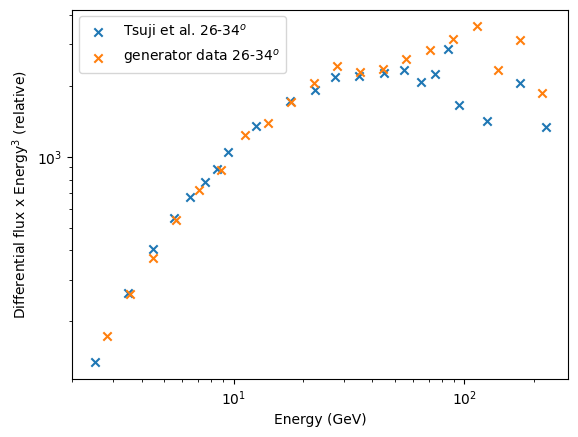

In [58]:
# BESSm=plot(BESS)
# plt.scatter(BESSm[0],(1/fit(BESS))*BESSm[1]*BESSm[0]**3,label='bess_minus',marker='x')
# plt.plot(x,y*x**3,label='best fit',color='m')
# BESSp=plot(BESS_plus)
# plt.scatter(BESSp[0],(1/fit(BESS_plus))*BESSp[1]*BESSm[0]**3,label='bess_plus',marker='x')
# tsujip=plot(tsuji)
# plt.scatter(tsujip[0],(1/fit(tsuji))*tsujip[1]*tsujip[0]**3,label='tsuji',marker='x')
# BESS2p=plot(BESS2)
# plt.scatter(BESS2p[0],(1/fit(BESS2p))*BESS2p[1]*BESS2p[0]**3,label='BESS2_plus',marker='x')
BESS2m=plot(BESS2_minus)
plt.scatter(BESS2m[0],(1/fit(BESS2m))*BESS2m[1]*BESS2m[0]**3,label='Tsuji et al. 26-34$^o$',marker='x')
gen=[numpy.array(generator_data['p_average']),numpy.array(generator_data['diff_int'])]
plt.scatter(gen[0],(1/fit([generator_data['p_average'],generator_data['diff_int']]))*gen[1]*gen[0]**3,label='generator data 26-34$^o$',marker='x')
# gen_vert=[numpy.array(generator_data_vert['p_average']),numpy.array(generator_data_vert['diff_int'])]
# plt.scatter(gen_vert[0],(1/fit([generator_data_vert['p_average'],generator_data_vert['diff_int']]))*gen_vert[1]*gen_vert[0]**3,label='generator data vertical',marker='x')
plt.legend()
plt.xlabel('Energy (GeV)')
plt.ylabel('Differential flux x Energy$^3$ (relative)')
plt.xscale('log')
plt.yscale('log')
plt.show()

Generates a comparison plot between the three relavent curves 

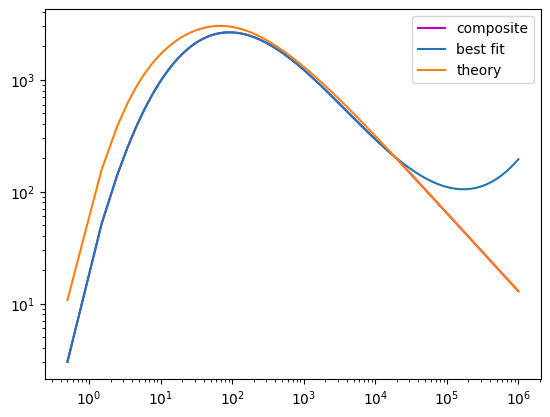

In [116]:
xt=numpy.linspace(0.5,1000000, 1000000)
yt=functions.composite(E_mu=xt)
yt2=functions.best_fit(E_mu=xt)
yt3=functions.theory_supressed(E_mu=xt)
plt.plot(xt,yt*xt**3, label='composite', color='m')
plt.plot(xt,yt2*xt**3, label='best fit')
plt.plot(xt,yt3*xt**3, label='theory')
plt.xscale('log')
plt.yscale('log')
plt.legend()